In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df_healthcare=pd.read_csv('capstone datasets/healthcaredatasets-DataScience/healthcare_dataset.csv')

### Patient Healthcare Record Fields

- **Name**: Patient’s name associated with the healthcare record.  
- **Age**: Patient’s age at the time of admission, in years.  
- **Gender**: Patient’s gender, either *"Male"* or *"Female."*  
- **Blood Type**: Patient’s blood type (e.g., *"A+"*, *"O-"*).  
- **Medical Condition**: Primary medical condition or diagnosis (e.g., *"Diabetes"*, *"Hypertension"*).  
- **Date of Admission**: Date of patient admission to the healthcare facility.  
- **Doctor**: Name of the doctor responsible for the patient’s care during admission.  
- **Hospital**: Healthcare facility or hospital where the patient was admitted.  
- **Insurance Provider**: Patient’s insurance provider (e.g., *"Aetna"*, *"Blue Cross"*).  
- **Billing Amount**: Amount billed for healthcare services, expressed as a floating-point number.  
- **Room Number**: Room number where the patient was accommodated.  
- **Admission Type**: Type of admission (*"Emergency"*, *"Elective"*, or *"Urgent"*).  
- **Discharge Date**: Date of discharge from the healthcare facility, based on admission date and a realistic range of days.  
- **Medication**: Medication prescribed or administered (e.g., *"Aspirin"*, *"Ibuprofen"*).  
- **Test Results**: Results of medical tests during admission (*"Normal"*, *"Abnormal"*, *"Inconclusive"*).


In [4]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df_healthcare.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df_healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


#### Scatter plot

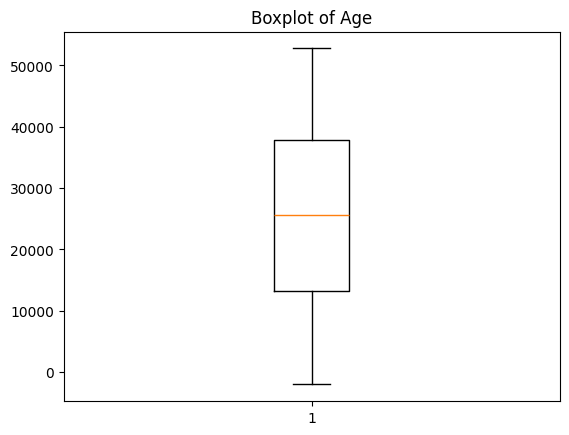

In [14]:
plt.boxplot(df_healthcare['Billing Amount'],)
plt.title('Boxplot of Age') 
plt.show()

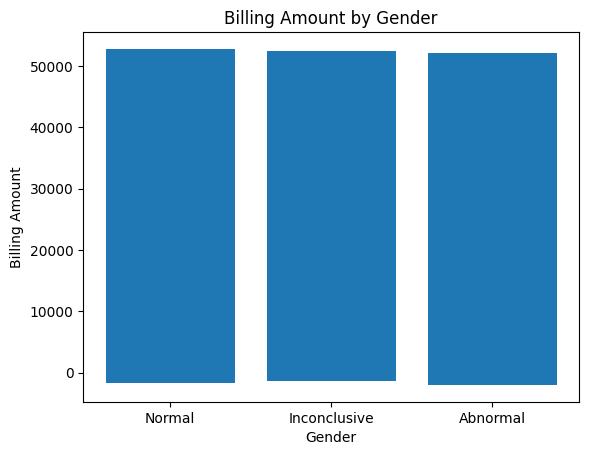

In [ ]:
plt.bar(df_healthcare['Test Results'], df_healthcare['Billing Amount'])
plt.ylabel('Billing Amount')
plt.title('Billing Amount by Gender')
plt.show()


In [ ]:
df_healthcare.groupby('Test Results')['Billing Amount'].sum()
df_healthcare.groupby('Test Results')['Billing Amount'].mean()
df_healthcare.groupby('Test Results')['Billing Amount'].count()
df_healthcare.groupby('Test Results')['Billing Amount'].max()
df_healthcare.groupby('Test Results')['Billing Amount'].min()
df_healthcare.groupby('Test Results')['Billing Amount'].std()
df_healthcare.groupby('Test Results')['Billing Amount'].var()
df_healthcare.groupby('Test Results')['Billing Amount'].median()
df_healthcare.groupby('Test Results')['Billing Amount'].quantile(0.25)

Test Results
Abnormal        13259.291956
Inconclusive    13354.200590
Normal          13109.077021
Name: Billing Amount, dtype: float64

#### Since clustering is unsupervised learning, therefore, there is no X and y

In [ ]:
# X=df_healthcare.drop(labels='Test Results',axis=1)
# y=df_healthcare['Test Results']

#### Encoding

In [34]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition','Admission Type','Insurance Provider','Medication','Test Results']
numeric_cols = ['Age', 'Billing Amount']

In [38]:
#Encode categorical columns
df_encoded = pd.get_dummies(df_healthcare[categorical_cols], drop_first=True)

df_all = pd.concat([df_healthcare[numeric_cols], df_encoded], axis=1)
df_all.head()

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,30,18856.281306,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,True
1,62,33643.327287,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,76,27955.096079,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28,37909.782410,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
4,43,14238.317814,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Feature scaling

This dataset has only two int columns, Age and Room Number. These two columns do not require any standardization

In [ ]:
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# print(f'standard_features std is {X_train_scaled.std(axis=0)}')
# print(f'standard_features mean is {X_train_scaled.mean(axis=0)}')

# X_test_scaled=scaler.transform(X_test)
# print(f'standard_features std is {X_test_scaled.std(axis=0)}')
# print(f'standard_features mean is {X_test_scaled.mean(axis=0)}')

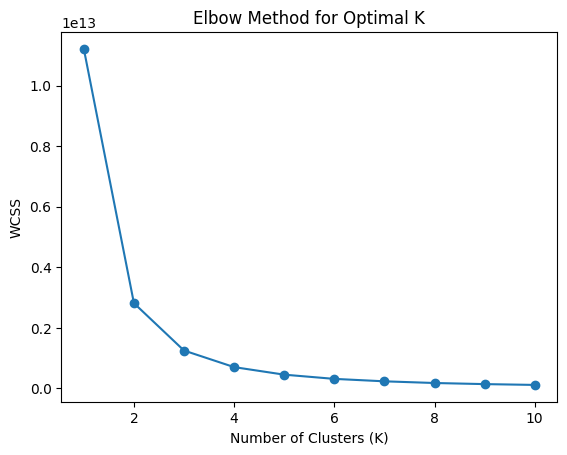

In [39]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_all)
    wcss.append(kmeans.inertia_)  # WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


#### Setting KMeans model and prediction

In [40]:
km=KMeans(n_clusters=3, random_state=42)
y_predicted=km.fit_predict(df_all)
print(f'KMeans inertia: {km.inertia_}')
print(f'KMeans labels: {km.labels_}')
print(f'KMeans cluster centers: {km.cluster_centers_}')


KMeans inertia: 1251477689870.697
KMeans labels: [2 2 2 ... 2 2 0]
KMeans cluster centers: [[5.16187019e+01 9.10884154e+03 5.01733666e-01 1.25040633e-01
  1.26503413e-01 1.23252790e-01 1.24173800e-01 1.26774298e-01
  1.30133276e-01 1.20381406e-01 1.65348358e-01 1.70224293e-01
  1.65835952e-01 1.68761513e-01 1.59876476e-01 3.29450645e-01
  3.37089609e-01 1.97366995e-01 2.04680897e-01 1.98450536e-01
  2.04193304e-01 1.96445985e-01 2.06360386e-01 1.96012569e-01
  1.99913317e-01 3.26145845e-01 3.38498212e-01]
 [5.15008109e+01 4.19380996e+04 5.05027571e-01 1.26716402e-01
  1.23959347e-01 1.26337982e-01 1.20067034e-01 1.26500162e-01
  1.23689047e-01 1.26446102e-01 1.67910044e-01 1.60071359e-01
  1.69261542e-01 1.67207266e-01 1.67693805e-01 3.27494864e-01
  3.35063250e-01 1.97156449e-01 2.03211158e-01 2.00940642e-01
  2.01643421e-01 2.01319062e-01 1.99156666e-01 1.97697048e-01
  1.97426749e-01 3.30251919e-01 3.33225214e-01]
 [5.14991372e+01 2.55354875e+04 4.94553494e-01 1.24946074e-01
  1.250

In [37]:
df_all['cluster'] = y_predicted
df_all.head()

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Admission Type_Urgent,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,cluster
0,30,18856.281306,True,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,2
1,62,33643.327287,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,2
2,76,27955.096079,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
3,28,37909.782410,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,1
4,43,14238.317814,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,0
